In [33]:
# Chapter という文字列が含まれる行を抽出して別ファイルに保存する
# 抽出結果を書き込んだファイルを確認し、文中にChapterが含まれる行があるか確認する

import os
import re
from tqdm import tqdm

# ディレクトリの指定
source_directory = './texts'
check_directory = './check'

# 旧約を先にする
paths = sorted(os.listdir(source_directory), reverse=True)

for path in paths:
	print(f"\n---- {path} ----\n")
	with open(f'{source_directory}/{path}', mode='r', encoding='utf-8') as f:
		lines = f.readlines()
		with open(f'{check_directory}/{path.replace("bible", "chapters")}', mode='w', encoding='utf-8') as g:
			for line in tqdm(lines):
				if (re.search(r'Chapter', line)): g.write(line)


---- old.bible.txt ----



100%|██████████| 108347/108347 [00:00<00:00, 901207.63it/s]



---- new.bible.txt ----



100%|██████████| 29550/29550 [00:00<00:00, 1150719.38it/s]


In [43]:
# 旧約と新約で形式が少し違うため、形式をそろえる。
# Chapterごとに分類できるように無駄な文字を削除する
#
# ex)
# 1. Matther Chapter 1	 		-> Matther Chapter
# 2. Matther Chapter 2~ 		-> None
# 3. ~:~				   		-> None
# 4. THE BOOK OF ~		 		-> None
# 5. \n					   		-> None

import os
import re
from tqdm import tqdm

# ディレクトリの指定
source_directory = './texts'
target_directory = './clean'

# 旧約を先にする
paths = sorted(os.listdir(source_directory), reverse=True)

pattern12 = re.compile(r'^[0-9]?\s?[A-Za-z]+ Chapter [0-9]+$')
pattern3  = re.compile(r'^[0-9]+:[0-9]+.\s')
pattern45 = re.compile(r'^[THE BOOK OF [A-Z]+|\n')

for path in paths:
	print(f"\n---- {path} ----\n")

	with open(f'{source_directory}/{path}', mode='r', encoding='utf-8') as f:
		lines = f.readlines()

		with open(f'{target_directory}/{path}', mode='w', encoding='utf-8') as g:
			for line in tqdm(lines):
				if (re.match(pattern12, line)):
					match (line.strip().split()[-1]):
						case '1':
							line = re.sub(r'[0-9]+ ', '', line)
							line = re.sub('Chapter 1', 'Chapter', line)
							g.write(line)
						case _:
							continue
				elif (re.match(pattern3, line)): g.write(re.sub(pattern3, '', line))
				elif (re.match(pattern45, line)): continue
				else: g.write(line)


---- old.bible.txt ----



100%|██████████| 108347/108347 [00:00<00:00, 289783.52it/s]



---- new.bible.txt ----



100%|██████████| 29550/29550 [00:00<00:00, 285407.62it/s]


In [1]:
# 章ごとに別々のファイルに抽出する。

import os
import re
from tqdm import tqdm
from shutil import rmtree

# ディレクトリの指定
source_directory = './clean'

# 旧約を先にする
paths = sorted(os.listdir(source_directory), reverse=True)

for path in paths:
	if path.split('.')[-1] != 'txt': continue
	
	print(f"\n---- {path} ----\n")
	if (os.path.exists(f"{source_directory}/{path.split('.')[0]}")):
		rmtree(f"{source_directory}/{path.split('.')[0]}")
		os.mkdir(f"{source_directory}/{path.split('.')[0]}")

	with open(f'{source_directory}/{path}', mode='r', encoding='utf-8') as f:
		lines = f.readlines()

	target_directory = None
	for line in tqdm(lines):
		if (re.search(r'[A-Za-z]+ Chapter$', line)):
			target_directory = f"{source_directory}/{path.split('.')[0]}/{line.split()[0]}.txt"
		elif target_directory is None: continue
		else:
			with open(target_directory, mode='a', encoding='utf-8') as g:
				g.write(line)


---- old.bible.txt ----



100%|██████████| 68802/68802 [00:15<00:00, 4341.19it/s]



---- new.bible.txt ----



100%|██████████| 18503/18503 [00:04<00:00, 4443.40it/s]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


100%|██████████| 2/2 [00:00<00:00, 39.82it/s]



Vocabulary:
{'book': 405, 'generation': 1325, 'jesus': 1876, 'christ': 586, 'son': 3190, 'david': 798, 'theson': 3630, 'abraham': 15, 'isaac': 1815, 'begot': 335, 'jacob': 1857, 'brethren.and': 439, 'judas': 1909, 'phares': 2620, 'zara': 4196, 'thamar': 3383, 'aram': 216, 'naasson': 2367, 'booz': 408, 'rahab': 2790, 'obed': 2424, 'ruth': 2918, 'andand': 126, 'jesse': 1875, 'king': 1943, 'solomon': 3187, 'wife': 4058, 'roboam': 2890, 'abia': 4, 'begotand': 336, 'asa': 230, 'joram': 1893, 'ozias': 2541, 'joatham': 1884, 'achaz': 31, 'ezechias': 1100, 'manasses': 2147, 'amon': 111, 'josias.and': 1900, 'josias': 1899, 'jechonias': 1864, 'brethren': 438, 'babylon.and': 282, 'babylon': 281, 'zorobabel': 4198, 'eliacim': 1013, 'sadoc': 2933, 'mathan': 2181, 'jacob.and': 1858, 'husband': 1718, 'hebrews': 1546, 'notice': 2418, 'women': 4108, 'asthey': 254, 'akin': 79, 'sheweth': 3085, 'other.so': 2525, 'generations': 1328, 'wise': 4080, 'child': 575, 'joseph': 1897, 'man': 2138, 'things': 3688

c:\MyFiles\学校関係\B2\DS応用\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21336 (\N{CJK UNIFIED IDEOGRAPH-5358}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\MyFiles\学校関係\B2\DS応用\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\MyFiles\学校関係\B2\DS応用\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\MyFiles\学校関係\B2\DS応用\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26360 (\N{CJK UNIFIED IDEOGRAPH-66F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


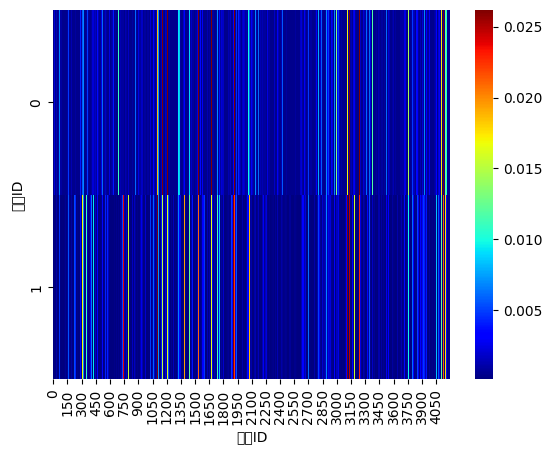


Document 0: Words with TF-IDF score >= 0.1
i: 0.4689
god: 0.3429
man: 0.3056
jesus: 0.2946
things: 0.2641
lord: 0.2393
christ: 0.1654
thou: 0.1406
men: 0.1329
father: 0.1182
hath: 0.1182
son: 0.1134
day: 0.1040

Document 1: Words with TF-IDF score >= 0.1
lord: 0.5726
i: 0.3542
god: 0.2464
thou: 0.2084
king: 0.1748
man: 0.1710
thee: 0.1670
son: 0.1575
israel: 0.1562
people: 0.1561
children: 0.1315
house: 0.1259
day: 0.1255
land: 0.1232
hath: 0.1224
men: 0.1157
shalt: 0.1066


In [1]:
# 旧約、新約それぞれでTF-IDFを計算し、ヒートマップを表示する

%matplotlib inline
import sys
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from pprint import pprint

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def english_tokenize(text):
	words = word_tokenize(text)
	tagged_words = pos_tag(words)

	selected_words = [word for word, pos in tagged_words if pos.startswith("NN")]

	return selected_words

in_path = "./clean/" # 入力ディレクトリ

if __name__ == '__main__':

	# ファイル・ディレクトリの一覧を取得
	in_dir_all = os.listdir(in_path)
	#ファイルのみの一覧を取得
	files = [f for f in in_dir_all if os.path.isfile(os.path.join(in_path, f))]

	texts = []
	print()
	for f in tqdm(files):
		with open(os.path.join(in_path, f), encoding="utf-8") as r:
			s = r.read()
			s = ''.join(s.splitlines()) # 改行削除

		texts.append(s)

	vec = TfidfVectorizer(tokenizer=english_tokenize, min_df=2, token_pattern=None)
	vec.fit(texts)

	print("\nVocabulary:")
	print(vec.vocabulary_)
	print("# of vocabulary: " + str(len(vec.vocabulary_)))

	bow = vec.transform(texts)
	print("--")
	print("BoW:")
	print(bow.toarray()[:, 26:])

	bow_pd = pd.DataFrame(bow.toarray()[:, 26:], columns=vec.get_feature_names_out()[26:])
	print("--")
	print(bow_pd)

	# ヒートマップ表示
	sns.heatmap(bow.toarray(), robust=True, cmap="jet")
	plt.xlabel("単語ID")
	plt.ylabel("文書ID")
	plt.show()

	threshold = 0.1  # 例として閾値を0.1に設定

	for i, row in enumerate(bow.toarray()):
		print(f"\nDocument {i}: Words with TF-IDF score >= {threshold}")
		
		# 閾値以上の単語のインデックスを取得
		valid_indices = row >= threshold  
		top_words = vec.get_feature_names_out()[valid_indices]
		top_scores = row[valid_indices]
		
		# 出力
		for word, score in sorted(zip(top_words, top_scores), key=lambda x: x[1], reverse=True):
			print(f"{word}: {score:.4f}")

In [13]:
# テキストデータを訓練用と本番用に分けたのち、
# BoW, svmを用いて本番用データ内の各章は旧約か新約かどちらに分類されるのかを予測する

%matplotlib inline
import sys
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def english_tokenize(text):
	words = word_tokenize(text)
	tagged_words = pos_tag(words)

	selected_words = [word for word, pos in tagged_words if pos.startswith("NN")]

	return selected_words

in_path = "./clean/" # 入力ディレクトリ

if __name__ == '__main__':

	# ファイル・ディレクトリの一覧を取得
	in_here_all = os.listdir(in_path)
	
	# ディレクトリのみの一覧を取得
	dirs = [d for d in in_here_all if os.path.isdir(os.path.join(in_path, d))]

	texts = [] # わかち書きテキスト
	filenames = [] # ファイル名

	labels = [] # ラベル
	
	for dir in dirs:
		print(f"\n -- {dir} --\n")

		# ファイル・ディレクトリの一覧を取得
		in_dir_all = os.listdir(os.path.join(in_path, dir))

		# ファイルのみの一覧を取得
		files = [f for f in in_dir_all if os.path.isfile(os.path.join(f"{in_path}/{dir}", f))]

		for file in tqdm(files):
			filenames.append(f"{in_path}{dir}/{file}")

			# ラベルの作成
			# 01_ではじまる文書はラベル(0)
			if dir.startswith('new'):
				labels.append(1)
			# それ意外の文書はラベル(1)
			else:  
				labels.append(2)

			with open(os.path.join(f"{in_path}/{dir}", file), encoding="utf-8") as r:
				s = r.read()
				s = ''.join(s.splitlines()) # 改行削除
			texts.append(s)

	# BOWの生成

	vec = CountVectorizer(tokenizer=english_tokenize, min_df=2, token_pattern=None)	
	vec.fit(texts)
	bow = vec.transform(texts)
	bow_array = bow.toarray()

	accurancy_list = {}

	# データセット（bow_array, labels）を学習用と評価用に分割
	# data_train: 学習用データ
	# data_test: 評価用データ
	# label_train: 学習用データの教師ラベル
	# label_test: 評価用データの教師ラベル
	# filename_train: 学習用データのファイル名
	# filename_test: 評価用データのファイル名
	for size in np.linspace(0.1, 0.9, 17):
		data_train, data_test, label_train, label_test, filename_train, filename_test = train_test_split(bow_array, labels, filenames, shuffle=True, train_size=size, random_state=0)

		# 線形SVM
		classifier = svm.LinearSVC()
		# モデルの学習
		classifier.fit(data_train, label_train)

		# 学習したモデルを用いた識別
		result = classifier.predict(data_test)
		# print("\n--")
		# print(f"Classification result: (train_size -> {size:.1f})")
		# 結果を確認（正解 > 結果）
		# for f, c, r in zip(filename_test, label_test, result):
		# 	print(f +": " + str(c) + " -> " + str(r))

		# 正解率の計算
		accurancy_list[round(size, 2)] = round(accuracy_score(label_test, result)*100, 2)
	
	print("\n--")
	print("Accurancy (sort by score):")
	for size, score in sorted(accurancy_list.items(), key=lambda x: x[1], reverse=True):
		print(f"train_size: {size} -> {score}%")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



 -- new --



100%|██████████| 20/20 [00:00<00:00, 3635.21it/s]



 -- old --



100%|██████████| 39/39 [00:00<00:00, 1799.42it/s]



--
Accurancy (sort by score):
train_size: 0.35 -> 97.44%
train_size: 0.4 -> 97.22%
train_size: 0.45 -> 96.97%
train_size: 0.5 -> 96.67%
train_size: 0.55 -> 96.3%
train_size: 0.6 -> 95.83%
train_size: 0.65 -> 95.24%
train_size: 0.25 -> 93.33%
train_size: 0.75 -> 93.33%
train_size: 0.3 -> 92.86%
train_size: 0.1 -> 92.59%
train_size: 0.15 -> 92.16%
train_size: 0.8 -> 91.67%
train_size: 0.2 -> 89.58%
train_size: 0.7 -> 88.89%
train_size: 0.85 -> 88.89%
train_size: 0.9 -> 83.33%
